In [1]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

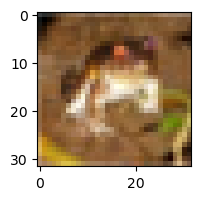

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

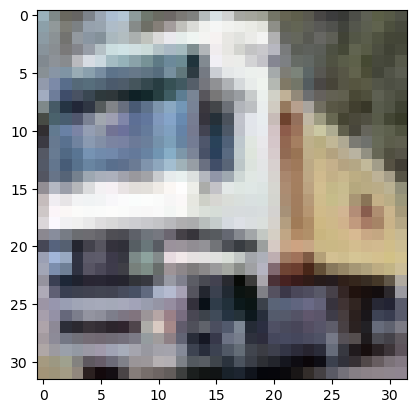

In [7]:
plt.imshow(X_train[1])

In [8]:
y_train[:5]    #it is two dimensional array. we didn't need two dimensional array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train=y_train.reshape(-1,)    #this is used to convert two-d array into 1-d array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
classes[9]

'truck'

In [13]:
y_train[1000]

9

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

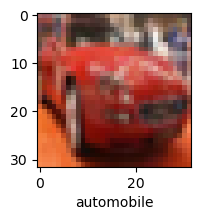

In [15]:
plot_sample(X_train,y_train,5)

In [16]:
y_train[5]

1

In [17]:
classes[1]

'automobile'

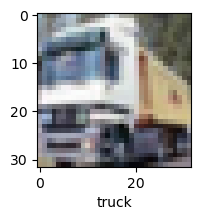

In [18]:
plot_sample(X_train,y_train,1)

In [19]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
X_train=X_train/255

In [21]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
X_test=X_test/255

In [23]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [24]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 80s 51ms/step - loss: 1.8146 - accuracy: 0.3503
Epoch 2/2
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6245 - accuracy: 0.4252


In [25]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.6059 - accuracy: 0.4283


[1.6058894395828247, 0.42829999327659607]

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.61      0.47      1000
           1       0.61      0.45      0.51      1000
           2       0.34      0.23      0.28      1000
           3       0.30      0.43      0.35      1000
           4       0.34      0.53      0.41      1000
           5       0.41      0.23      0.30      1000
           6       0.51      0.45      0.48      1000
           7       0.65      0.29      0.41      1000
           8       0.46      0.67      0.54      1000
           9       0.59      0.39      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.46      0.43      0.42     10000
weighted avg       0.46      0.43      0.42     10000



In [27]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [28]:
y_pred[0]

array([0.06399684, 0.04833061, 0.14943692, 0.31854263, 0.04052224,
       0.14727063, 0.12215242, 0.00417357, 0.10113086, 0.00444331],
      dtype=float32)

In [29]:
np.argmax(y_pred[0])

3

In [30]:
y_pred[1]

array([1.02735825e-01, 1.21464185e-01, 2.99746753e-03, 3.58446897e-03,
       4.43388382e-03, 1.32357306e-03, 4.43071593e-04, 1.27220037e-03,
       6.13836288e-01, 1.47909075e-01], dtype=float32)

In [31]:
np.argmax(y_pred[1])

8

In [32]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #Dense 
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [34]:
cnn.fit(X_train,y_train,epochs=4)

Epoch 1/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4945 - accuracy: 0.4649
Epoch 2/4
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1422 - accuracy: 0.5998
Epoch 3/4
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0097 - accuracy: 0.6476
Epoch 4/4
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9295 - accuracy: 0.6778


In [35]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 11ms/step - loss: 1.0172 - accuracy: 0.6464


[1.0172003507614136, 0.646399974822998]

In [36]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[9.34065413e-03, 6.04303961e-04, 2.93559693e-02, 8.04775596e-01,
        2.16595177e-03, 1.27429008e-01, 1.78175345e-02, 3.72614857e-04,
        7.70504726e-03, 4.33377922e-04],
       [2.29776070e-01, 3.59606802e-01, 1.04991021e-03, 2.65928247e-05,
        3.04136684e-05, 4.33270344e-07, 3.42208932e-06, 4.02132537e-05,
        4.01958495e-01, 7.50768790e-03],
       [1.75259650e-01, 2.41297960e-01, 1.62218101e-02, 2.02458650e-02,
        6.02530036e-03, 3.18410550e-03, 6.23994565e-04, 1.59262922e-02,
        4.65505481e-01, 5.57095632e-02],
       [8.95790637e-01, 1.94796007e-02, 8.78823921e-03, 7.69190025e-04,
        4.93955100e-03, 2.40135450e-05, 1.76199712e-04, 3.41059203e-04,
        6.94972798e-02, 1.94354972e-04],
       [4.62482058e-05, 1.00485093e-04, 5.72745241e-02, 1.15674384e-01,
        1.99413568e-01, 1.56979151e-02, 6.11603439e-01, 1.20415141e-04,
        6.18478880e-05, 7.11864459e-06]], dtype=float32)

In [37]:
np.argmax([3,56,24,67])  #this function gives the index of the maximum number

3

In [38]:
np.argmax(y_pred[0])

3

In [39]:
y_classes=[np.argmax(element) for element in y_pred]

In [40]:
y_classes[:5]

[3, 8, 8, 0, 6]

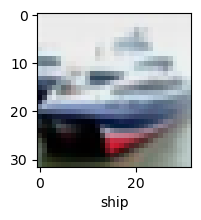

In [41]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [42]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [43]:
classes[y_classes[1]]

'ship'

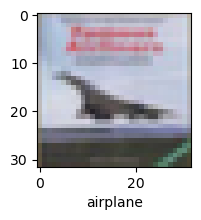

In [44]:
plot_sample(X_test,y_test,3)

In [45]:
classes[y_classes[3]]

'airplane'

In [46]:
print('Classification Report: \n',classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.81      0.69      1000
           1       0.74      0.85      0.79      1000
           2       0.43      0.66      0.52      1000
           3       0.46      0.50      0.48      1000
           4       0.77      0.36      0.49      1000
           5       0.61      0.54      0.58      1000
           6       0.74      0.77      0.76      1000
           7       0.69      0.75      0.72      1000
           8       0.88      0.60      0.71      1000
           9       0.87      0.61      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.65     10000
weighted avg       0.68      0.65      0.65     10000

